<a href="https://colab.research.google.com/github/dudaholandah/NLP/blob/main/Trabalhos/T5/Polaridade_Twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Feito por:

- Ariel Batista da Silva - 170099776
- Bruno Esteves Dalla Costa Filho - 170100863
- Maria Eduarda Machado de Holanda - 190043725

In [ ]:
!pip install keras
!pip install tensorflow

In [32]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.optimizers import SGD
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt

In [33]:
path_train = 'https://raw.githubusercontent.com/viniciusrpb/cic0269_natural_language_processing/main/datasets/corpora/tweets_polarity_classification/twitter-2013train-A.txt'
path_test = 'https://raw.githubusercontent.com/viniciusrpb/cic0269_natural_language_processing/main/datasets/corpora/tweets_polarity_classification/twitter-2013test-A.txt'
path_valid = 'https://raw.githubusercontent.com/viniciusrpb/cic0269_natural_language_processing/main/datasets/corpora/tweets_polarity_classification/twitter-2013dev-A.txt'

In [34]:
df_train = pd.read_csv(path_train,names=['id','polarity','text'],sep='\t')
df_valid = pd.read_csv(path_valid,names=['id','polarity','text'],sep='\t')
df_test = pd.read_csv(path_test,names=['id','polarity','text'],sep='\t')

In [35]:
df_test

,id,polarity,text
0,264238274963451904,positive,"@jjuueellzz down in the Atlantic city, ventnor..."
1,218775148495515649,positive,Musical awareness: Great Big Beautiful Tomorro...
2,258965201766998017,neutral,On Radio786 100.4fm 7:10 Fri Oct 19 Labour ana...
3,262926411352903682,negative,"Kapan sih lo ngebuktiin,jan ngomong doang Susa..."
4,171874368908050432,neutral,"Excuse the connectivity of this live stream, f..."
...,...,...,...
3542,264233437060288512,negative,Khaleda Zia's present India visit may have a b...
3543,263779058284904448,neutral,"FYI, golf fans: @jameslepp will join Moj on We..."
3544,250744453831213056,negative,@__Aniko you think mr.Calle let practice with ...
3545,258679974591090688,positive,Don't hide under your desk! It's just a salsa ...


In [36]:
print(f'Train size {df_train.shape}')
print(f'Valid size {df_valid.shape}')
print(f'Test size {df_test.shape}')

Train size (9684, 3)
Valid size (1654, 3)
Test size (3547, 3)


In [37]:
df_train = df_train.drop(labels=['id'],axis=1)
df_valid = df_valid.drop(labels=['id'],axis=1)
df_test = df_test.drop(labels=['id'],axis=1)

In [38]:
vectorizer = TfidfVectorizer(norm=None,lowercase=True,stop_words="english",max_df=0.95,min_df=2)

vectorizer.fit(df_train['text'])

tfidf_train = vectorizer.transform(df_train['text']).toarray()
tfidf_valid = vectorizer.transform(df_valid['text']).toarray()
tfidf_test = vectorizer.transform(df_test['text']).toarray()

In [39]:
df_train['polarity'] = pd.Categorical(df_train['polarity'])
y_train_int = df_train['polarity'].cat.codes

df_valid['polarity'] = pd.Categorical(df_valid['polarity'])
y_valid_int = df_valid['polarity'].cat.codes

df_test['polarity'] = pd.Categorical(df_test['polarity'])
y_test_int = df_test['polarity'].cat.codes

In [40]:
y_train = to_categorical(y_train_int)
y_valid = to_categorical(y_valid_int)
y_test = to_categorical(y_test_int)

In [41]:
X_train = tfidf_train
X_valid = tfidf_valid
X_test = tfidf_test

In [42]:
N = tfidf_train.shape[0]
vocab_size = tfidf_train.shape[1]
print(f'Quantidade de instancias de treinamento {N} e tamanho do vocabulario {vocab_size}')

Quantidade de instancias de treinamento 9684 e tamanho do vocabulario 7654


Arquitetura da Rede Multilayer Perceptron Profunda

Hyperparâmetros da rede

In [43]:
number_of_neurons_layer1 = 20
number_of_neurons_layer2 = 10
number_of_neurons_output = 3
lr = 0.01

In [44]:
model = Sequential()
# Input Layer
model.add(Dense(number_of_neurons_layer1,input_dim=vocab_size,activation='sigmoid'))
model.add(Dense(number_of_neurons_layer2,activation='sigmoid'))
model.add(Dense(number_of_neurons_output,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 20)                153100    
                                                                 
 dense_4 (Dense)             (None, 10)                210       
                                                                 
 dense_5 (Dense)             (None, 3)                 33        
                                                                 
Total params: 153,343
Trainable params: 153,343
Non-trainable params: 0
_________________________________________________________________


In [45]:
sgd = SGD(learning_rate=lr)
model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])

In [46]:
history = model.fit(X_train,y_train,validation_data=(X_valid,y_valid),epochs=50)

Epoch 1/50
303/303 [==============================] - 2s 5ms/step - loss: 1.0483 - accuracy: 0.4324 - val_loss: 1.0571 - val_accuracy: 0.4468
Epoch 2/50
303/303 [==============================] - 1s 4ms/step - loss: 1.0057 - accuracy: 0.4736 - val_loss: 1.0622 - val_accuracy: 0.4468
Epoch 3/50
303/303 [==============================] - 1s 4ms/step - loss: 1.0043 - accuracy: 0.4736 - val_loss: 1.0607 - val_accuracy: 0.4468
Epoch 4/50
303/303 [==============================] - 1s 4ms/step - loss: 1.0031 - accuracy: 0.4736 - val_loss: 1.0600 - val_accuracy: 0.4468
Epoch 5/50
303/303 [==============================] - 1s 4ms/step - loss: 1.0020 - accuracy: 0.4736 - val_loss: 1.0581 - val_accuracy: 0.4468
Epoch 6/50
303/303 [==============================] - 1s 4ms/step - loss: 1.0004 - accuracy: 0.4736 - val_loss: 1.0585 - val_accuracy: 0.4468
Epoch 7/50
303/303 [==============================] - 1s 4ms/step - loss: 0.9989 - accuracy: 0.4736 - val_loss: 1.0564 - val_accuracy: 0.4468
Epoch 

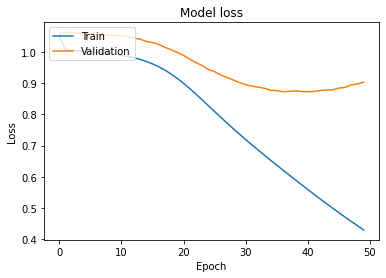

In [47]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

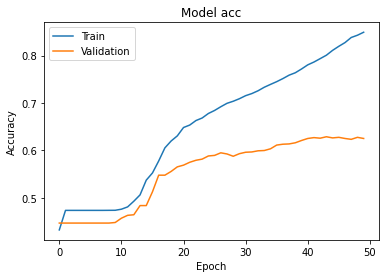

In [48]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model acc')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Avaliação com os Dados de Teste

In [49]:
y = model.evaluate(X_test,y_test)

111/111 [==============================] - 0s 3ms/step - loss: 0.8905 - accuracy: 0.6400


In [50]:
import numpy as np
y_prob = model.predict(X_test)
y_prob

array([[0.09632672, 0.17960463, 0.7240687 ],
       [0.02224664, 0.00680233, 0.970951  ],
       [0.05508947, 0.9103517 , 0.0345589 ],
       ...,
       [0.22962113, 0.5787278 , 0.19165109],
       [0.16441   , 0.0503062 , 0.7852838 ],
       [0.15219662, 0.5750512 , 0.2727522 ]], dtype=float32)

In [51]:
y_pred = np.argmax(y_prob,axis=1)
y_pred

array([2, 2, 1, ..., 1, 2, 1])

In [52]:
y_test_int

0       2
1       2
2       1
3       0
4       1
       ..
3542    0
3543    1
3544    0
3545    2
3546    1
Length: 3547, dtype: int8

Métricas de Avaliação de Desempenho

In [53]:
matriz_conf = [[0,0,0],[0,0,0],[0,0,0]]
y_real = y_test_int

In [54]:
for i,pred in enumerate(y_pred):
  matriz_conf[y_real[i]][pred] += 1

In [55]:
for l in matriz_conf:
  print(l)

[65, 379, 115]
[16, 1263, 234]
[16, 517, 942]


In [56]:
acuracia = (matriz_conf[0][0] + matriz_conf[1][1] + matriz_conf[2][2])/len(y_pred)
acuracia

0.6399774457287849

In [66]:
precisao = [0,0,0]

for i in range(3):
  precisao[i] = (matriz_conf[i][i])/(matriz_conf[0][i] + matriz_conf[1][i] + matriz_conf[2][i])

print(precisao)

[0.6701030927835051, 0.5849930523390459, 0.7296669248644462]


In [67]:
revocacao = [0,0,0]

for i in range(3):
  revocacao[i] = (matriz_conf[i][i])/(matriz_conf[i][0] + matriz_conf[i][1] + matriz_conf[i][2])

print(revocacao)

[0.11627906976744186, 0.8347653668208856, 0.6386440677966102]


In [68]:
f1_score = [0,0,0]

for i in range(3):
  f1_score[i] = (2*precisao[i]*revocacao[i])/(precisao[i] + revocacao[i])

print(f1_score)

[0.19817073170731705, 0.6879084967320261, 0.6811279826464208]


In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_real, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.12      0.20       559
           1       0.58      0.83      0.69      1513
           2       0.73      0.64      0.68      1475

    accuracy                           0.64      3547
   macro avg       0.66      0.53      0.52      3547
weighted avg       0.66      0.64      0.61      3547

